# Covid-Routing
***

By
- Jin Ho Lee jinhohl2@illinois.edu <br>
<br>
Project directed by Richard Sowers<br>
<br>
- r-sowers@illinois.edu<br>
- https://publish.illinois.edu/r-sowers/<br>
<br>
Copyright 2020 University of Illinois Board of Trustees. All Rights Reserved.
Licensed under the MIT license

***
ZipCode_LatLng.cvv from Chicago Data Guy <br>
http://robparal.blogspot.com/2013/07/chicago-community-area-and-zip-code.html <br>
ZipCode_Population.csv from Chicago Data Portal <br>
https://data.cityofchicago.org/Health-Human-Services/Chicago-Population-Counts/85cm-7uqa

In [168]:
import pandas as pd
import requests
import html
from html.parser import HTMLParser
from bs4 import BeautifulSoup

In [ ]:
fname1="ZipCode_LatLng.csv"
fname2="ZipCode_Population.csv"

In [142]:
zipLatLng = pd.read_csv(fname1)
zipPop = pd.read_csv(fname2)
zipLatLng.head()


C:\Users\0416r\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,RecordNumber,Zipcode,ZipCodeType,City,State,LocationType,Lat,Long,Xaxis,Yaxis,Zaxis,WorldRegion,Country,LocationText,Location,Decommisioned,TaxReturnsFiled,EstimatedPopulation,TotalWages,Notes
0,1,704,STANDARD,PARC PARQUE,PR,NOT ACCEPTABLE,17.96,-66.22,0.38,-0.87,0.3,NaN,US,"Parc Parque, PR",NA-US-PR-PARC PARQUE,False,NaN,NaN,NaN,NaN
1,2,704,STANDARD,PASEO COSTA DEL SUR,PR,NOT ACCEPTABLE,17.96,-66.22,0.38,-0.87,0.3,NaN,US,"Paseo Costa Del Sur, PR",NA-US-PR-PASEO COSTA DEL SUR,False,NaN,NaN,NaN,NaN
2,3,704,STANDARD,SECT LANAUSSE,PR,NOT ACCEPTABLE,17.96,-66.22,0.38,-0.87,0.3,NaN,US,"Sect Lanausse, PR",NA-US-PR-SECT LANAUSSE,False,NaN,NaN,NaN,NaN
3,4,704,STANDARD,URB EUGENE RICE,PR,NOT ACCEPTABLE,17.96,-66.22,0.38,-0.87,0.3,NaN,US,"Urb Eugene Rice, PR",NA-US-PR-URB EUGENE RICE,False,NaN,NaN,NaN,NaN
4,5,704,STANDARD,URB GONZALEZ,PR,NOT ACCEPTABLE,17.96,-66.22,0.38,-0.87,0.3,NaN,US,"Urb Gonzalez, PR",NA-US-PR-URB GONZALEZ,False,NaN,NaN,NaN,NaN


In [143]:
#Drop Uneccessary Columns
zipLatLng.drop(["RecordNumber","LocationType","WorldRegion","Country","Location","Decommisioned","TaxReturnsFiled","EstimatedPopulation","TotalWages","Notes"],axis=1)
zipPop.drop(["Geography Type","Year", "Population - Age 0-17","Population - Age 18-29","Population - Age 30-39","Population - Age 40-49","Population - Age 50-59","Population - Age 60-69","Population - Age 70-79","Population - Age 80+","Population - Female","Population - Male","Population - Latinx","Population - Asian Non-Latinx","Population - Black Non-Latinx","Population - White Non-Latinx","Population - Other Race Non-Latinx","Record ID"],axis=1)

,Geography,Population - Total
0,Chicago,2705988
1,60601,14675
2,60602,1244
3,60603,1174
4,60604,782
5,60605,27519
6,60606,3101
7,60607,29591
8,60608,79205
9,60609,61495


In [140]:
#Only interested in Chicago
zipLatLng.fillna(" ", inplace=True)
zipLatLng.isnull().sum()
zipLatLng[zipLatLng.LocationText.str.contains("Chicago", case=False)]
zipLatLng.loc[zipLatLng["State"]=="IL"]

,RecordNumber,Zipcode,ZipCodeType,City,State,LocationType,Lat,Long,Xaxis,Yaxis,Zaxis,WorldRegion,Country,LocationText,Location,Decommisioned,TaxReturnsFiled,EstimatedPopulation,TotalWages,Notes
26840,26841,61230,STANDARD,ALBANY,IL,PRIMARY,41.78,-90.21,-0.002857,-0.74,0.66,,US,"Albany, IL",NA-US-IL-ALBANY,False,618,1094,2.20923e+07,
26841,26842,61230,STANDARD,CEFFCO,IL,NOT ACCEPTABLE,41.78,-90.21,-0.002857,-0.74,0.66,,US,"Ceffco, IL",NA-US-IL-CEFFCO,False,618,1094,2.20923e+07,
26842,26843,61231,STANDARD,ALEDO,IL,PRIMARY,41.19,-90.74,-0.009815,-0.75,0.65,,US,"Aledo, IL",NA-US-IL-ALEDO,False,2602,4604,8.17567e+07,
26843,26844,61231,STANDARD,HAMLET,IL,NOT ACCEPTABLE,41.19,-90.74,-0.009815,-0.75,0.65,,US,"Hamlet, IL",NA-US-IL-HAMLET,False,2602,4604,8.17567e+07,
26844,26845,61231,STANDARD,MERCER,IL,NOT ACCEPTABLE,41.19,-90.74,-0.009815,-0.75,0.65,,US,"Mercer, IL",NA-US-IL-MERCER,False,2602,4604,8.17567e+07,
26845,26846,61231,STANDARD,OHIO GROVE,IL,NOT ACCEPTABLE,41.19,-90.74,-0.009815,-0.75,0.65,,US,"Ohio Grove, IL",NA-US-IL-OHIO GROVE,False,2602,4604,8.17567e+07,
26846,26847,61231,STANDARD,OLD GILCHRIST,IL,NOT ACCEPTABLE,41.19,-90.74,-0.009815,-0.75,0.65,,US,"Old Gilchrist, IL",NA-US-IL-OLD GILCHRIST,False,2602,4604,8.17567e+07,
26847,26848,61231,STANDARD,SHALE CITY,IL,NOT ACCEPTABLE,41.19,-90.74,-0.009815,-0.75,0.65,,US,"Shale City, IL",NA-US-IL-SHALE CITY,False,2602,4604,8.17567e+07,
26848,26849,61231,STANDARD,SUNBEAM,IL,NOT ACCEPTABLE,41.19,-90.74,-0.009815,-0.75,0.65,,US,"Sunbeam, IL",NA-US-IL-SUNBEAM,False,2602,4604,8.17567e+07,
26849,26850,61231,STANDARD,WANLOCK,IL,NOT ACCEPTABLE,41.19,-90.74,-0.009815,-0.75,0.65,,US,"Wanlock, IL",NA-US-IL-WANLOCK,False,2602,4604,8.17567e+07,


# Web Scraping: Enter Zip Code, Search various data on web, obtain & Parse the HTML data.

Input Zip Code:61517
https://www.zip-codes.com/zip-code/61517/zip-code-61517.asp

<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN">

<html>
<head>
<title>ZIP Code 61517, Database - Brimfield Illinois Map, U.S. ZIP Codes, Brimfield IL</title>
<meta content="Zip Code 61517 - Brimfield IL Illinois, USA - Peoria County" name="description"/>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="en-us" http-equiv="content-language"/>
<meta content="index,follow" name="robots"/>
<link href="https://www.zip-codes.com/zip-code/61517/zip-code-61517.asp" rel="canonical"/>
<link href="https://www.zip-codes.com/m/zip-code/61517/zip-code-61517.asp" media="only screen and (max-width: 640px)" rel="alternate"/>
<script async="" src="https://www.googletagmanager.com/gtag/js?id=UA-23873959-1"></script><script>window.dataLayer = window.dataLayer || [];function gtag(){dataLayer.push(arguments);}gtag('js', new Date());gtag('config', 'UA-23873959-1');</script><scri
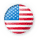

In [114]:
zipCode = input("Input Zip Code:")
URL_infoByZip = "https://www.zip-codes.com/zip-code/"+ zipCode +"/zip-code-"+ zipCode +".asp" 
print(URL_infoByZip)
zipInfoPage=requests.get(URL_infoByZip)
soup = BeautifulSoup(zipInfoPage.content, 'html.parser')
print(soup)

In [171]:
h= HTMLParser()
table_lists=soup.find_all('table')
print(len(table_lists))
statTables = []
for table in table_lists:
    statTables = table.find_all("table", class_ = "statTable")
    for statTable in statTables:
        trs = statTable.find_all("tr")
        for tr in trs:
            tds=tr.find_all("td")
            for td in tds:    
                label_elem = td.find("td", class_ = "label")
                info_elem = td.find("td",class_ = "info")
            
                    
                
#for statTable in staTables:
 #   tr= find_all(tr)
    
    #print(statTable)
    #for label in statTables:
     #   infoLabel = label.find("tbody")
      #  for rows in tbody:
       #     label = row.find("tr")

7


C:\Users\0416r\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: The unescape method is deprecated and will be removed in 3.5, use html.unescape() instead.
  from ipykernel import kernelapp as app


TypeError: argument of type 'NoneType' is not iterable